<a href="https://colab.research.google.com/github/toshi47/SOM/blob/main/SOM_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
!pip install mlrose
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
!pip install sompy
!pip install git+https://github.com/compmonks/SOMPY.git
!pip install ipdb==0.8.1
import sompy
from sompy.sompy import SOMFactory
from PIL import Image
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sompy: filename=sompy-0.1.1-py2.py3-none-any.whl size=3084 sha256=cadf4c5bbc99bdc02be400c7185ffb0bcd7143f2345c091ddd45020df41dd94c
  Stored in directory: /root/.cache/pip/wheels/e0/93/8c/ff042b6386b17bf7751db3c0ea76db7afb88ded186672f3a3e
Successfully built sompy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/compmonks/SOMPY.git to /tmp/pip-req-build-cfqyimmb
  Running command git clone -q https://github.com/compmonks/SOMPY.git /tmp/pip-req-build-cfqyimmb
  Created wheel for SOMPY: filename=SOMPY-1.0-py3-none-any.whl size=24355 sha256=06517b5408a39a1a2f5131b77386d030885c9398cabc9e033866854faba4b1e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-1d8w6h7n/wheels/95/17/cc/71d201765eff59c98d440

Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [116]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(type(train_X[0]))
train_X=train_X[:50000]
train_X=np.reshape(train_X,(50000,784))
print(train_X.shape)

<class 'numpy.ndarray'>
(50000, 784)


In [121]:
mapsize = [5,5]
#print(dataset)
print(train_X.shape)
som = sompy.SOMFactory.build(train_X, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  

#print(dataset)
#print(np.shape(dataset))


som.train(n_job=1, train_rough_len=100, train_finetune_len=100)  # verbose='debug' will print more, and verbose=None wont print 

topographic_error = som.calculate_topographic_error() ## Quality of the map itself, SOM nodes themselves
quantization_error = np.mean(som._bmu[1]) ## Quality of the affectation of our observations to each node in the SOM map
print('Topographic error = %s; Quantization error = %s' % (topographic_error, quantization_error))

(50000, 784)


 Training...
 pca_linear_initialization took: 6.694000 seconds
 Rough training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.484000, quantization error: 22.818487

 epoch: 2 ---> elapsed time:  0.505000, quantization error: 22.520954

 epoch: 3 ---> elapsed time:  0.506000, quantization error: 21.685646

 epoch: 4 ---> elapsed time:  0.513000, quantization error: 21.367987

 epoch: 5 ---> elapsed time:  0.494000, quantization error: 21.270543

 epoch: 6 ---> elapsed time:  0.507000, quantization error: 21.221736

 epoch: 7 ---> elapsed time:  0.501000, quantization error: 21.198402

 epoch: 8 ---> elapsed time:  0.499000, quantization error: 21.184589

 epoch: 9 ---> elapsed time:  0.498000, quantization error: 21.174809

 epoch: 10 ---> elapsed time:  0.509000, quantization error: 21.166532

 epoch: 11 ---> elapsed time:  0.496000, quantization error: 21.159889

 epoch: 12 ---> elapsed time:  0.487000, quantization error: 21.153589



Topographic error = 0.10454; Quantization error = 21.10379648765946


In [122]:
from sompy.visualization.mapview import View2D
v = sompy.mapview.View2DPacked(20, 20, 'test',text_size=10)  
map_labels = som.cluster(n_clusters=10)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]]) # mapping labels from grid to original data
print(data_labels.shape)
y=train_y[:50000]
(y == data_labels).sum()

(50000,)


2830

/usr/local/lib/python3.7/dist-packages/sompy/visualization/mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


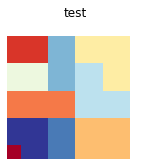

In [123]:
v.show(som, what='cluster')

/usr/local/lib/python3.7/dist-packages/sompy/visualization/hitmap.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


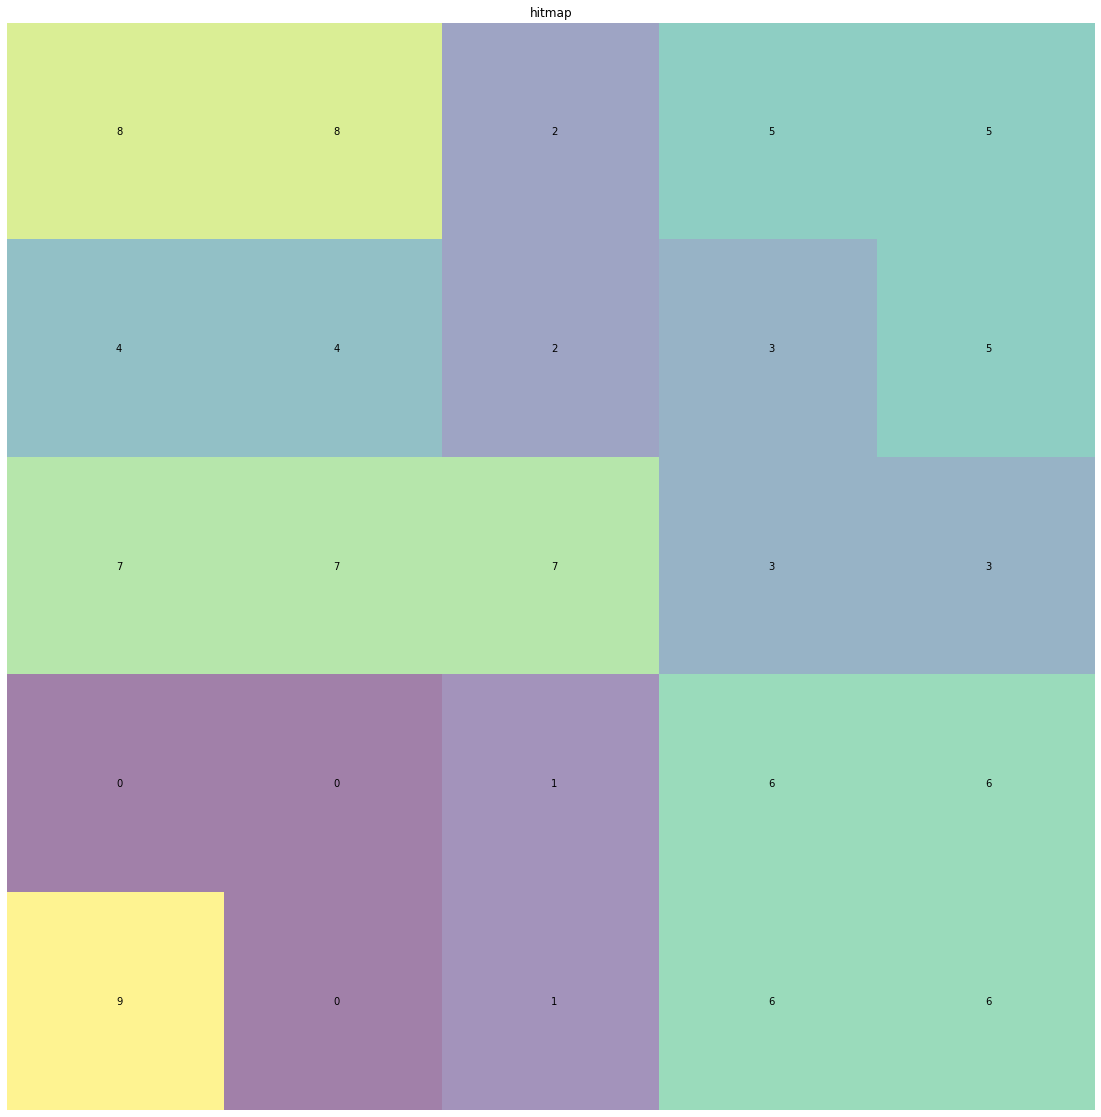

array([[ 0,  0,  0],
       [ 0,  1,  1],
       [ 0,  2,  2],
       [ 0,  3,  3],
       [ 0,  4,  4],
       [ 1,  0,  5],
       [ 1,  1,  6],
       [ 1,  2,  7],
       [ 1,  3,  8],
       [ 1,  4,  9],
       [ 2,  0, 10],
       [ 2,  1, 11],
       [ 2,  2, 12],
       [ 2,  3, 13],
       [ 2,  4, 14],
       [ 3,  0, 15],
       [ 3,  1, 16],
       [ 3,  2, 17],
       [ 3,  3, 18],
       [ 3,  4, 19],
       [ 4,  0, 20],
       [ 4,  1, 21],
       [ 4,  2, 22],
       [ 4,  3, 23],
       [ 4,  4, 24]])

In [124]:
h = sompy.hitmap.HitMapView(20, 20, 'hitmap', text_size=10, show_text=True)
h.show(som)